In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [34]:
# importing full dataset and creating subdatasets for comparisons

dataset = pd.read_csv('Regression_2012-2017_Medicare.csv')
dataset = dataset.drop(['HCPCS Code', 'Average Medicare Standardized Payment Amount', 'HCPCS Description','HCPCS Drug Indicator'], axis=1)
southData = dataset[dataset['Region'] == 'South']
dataset = pd.get_dummies(dataset, columns = ['NPPES Provider State Description', 'Place of Service', 'category', 'Region'], drop_first = True)

# this is for heart specific procedures
heartData = pd.read_excel('Heart_Analysis_2012-2017_Medicare.xlsx')
heartData.dropna()
southHeartData = heartData[heartData['Region'] == 'South']
florida = heartData[heartData['NPPES Provider State Description'] == 'Florida']
texas = heartData[heartData['NPPES Provider State Description'] == 'Texas']
newJersey = heartData[heartData['NPPES Provider State Description'] == 'New Jersey']

In [98]:
dataset.describe()

,Average Medicare Allowed Amount,Average Medicare Payment Amount,Average Submitted Charge Amount,Maximum Medicare Allowed Amount,Maximum Medicare Payment Amount,Maximum Submitted Charge Amount,Minimum Medicare Allowed Amount,Minimum Medicare Payment Amount,Minimum Submitted Charge Amount,Number of Distinct Medicare Beneficiary/Per Day Services,...,Place of Service_O,category_Medicine Services and Procedures,category_Others,category_Pathology and Laboratory Procedures,category_Radiology Procedures,category_Surgery,Region_North-East,Region_Other,Region_South,Region_West
count,516124.000000,516124.000000,516124.000000,516124.000000,516124.000000,516124.000000,516124.000000,516124.000000,516124.000000,5.161240e+05,...,516124.000000,516124.000000,516124.000000,516124.000000,516124.000000,516124.000000,516124.000000,516124.000000,516124.000000,516124.000000
mean,277.326946,217.335085,1045.780486,463.112622,367.671527,2920.359683,119.957537,78.518610,309.707878,5.705441e+03,...,0.431625,0.141080,0.077293,0.115158,0.142729,0.486590,0.171344,0.016256,0.356963,0.214001
std,630.674520,494.788523,1830.485977,1063.282462,842.155292,5229.522282,470.053004,325.362379,799.978378,7.181376e+04,...,0.495303,0.348105,0.267057,0.319213,0.349797,0.499821,0.376810,0.126458,0.479104,0.410128
min,0.010000,0.000000,0.010000,0.010000,0.000000,0.010000,0.000014,0.000000,0.000014,1.100000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.531290,27.431071,113.283498,40.850000,33.400000,250.000000,21.858458,1.671500,40.998548,3.400000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,117.270205,90.286120,390.658229,151.850000,120.784118,919.000000,56.060000,27.920000,125.000000,1.230000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,346.111745,270.542273,1366.196196,605.243077,478.602500,3579.000000,125.840000,82.161000,349.772812,7.100000e+02,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,45378.160380,36293.756350,90047.753710,93972.444440,75165.511110,99999.990000,42023.320000,30774.315530,54087.000000,9.369724e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


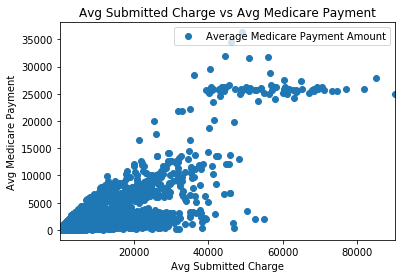

In [74]:
dataset.plot(x='Average Submitted Charge Amount', y='Average Medicare Payment Amount', style='o')
plt.title('Avg Submitted Charge vs Avg Medicare Payment')
plt.xlabel('Avg Submitted Charge')
plt.ylabel('Avg Medicare Payment')
plt.show();

In [75]:
x = dataset.iloc[:, dataset.columns != 'Average Medicare Payment Amount']
y = dataset['Average Medicare Payment Amount'].values

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [78]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df.head(20)

,Coefficient
Average Medicare Allowed Amount,7.875876e-01
Average Submitted Charge Amount,5.733088e-04
Maximum Medicare Allowed Amount,-1.240084e-01
Maximum Medicare Payment Amount,1.576825e-01
Maximum Submitted Charge Amount,-1.135947e-04
Minimum Medicare Allowed Amount,-6.295628e-03
Minimum Medicare Payment Amount,8.105001e-03
Minimum Submitted Charge Amount,-9.638201e-04
Number of Distinct Medicare Beneficiary/Per Day Services,-5.506839e-07
Number of Providers,-1.503939e-04


In [80]:
y_pred = regressor.predict(x_test)

In [81]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25)

,Actual,Predicted
0,912.716071,906.393430
1,540.485000,536.898429
2,44.434641,44.332109
3,1148.210230,1157.881852
4,44.802833,42.343156
5,28.369967,27.075591
6,40.554849,40.223054
7,11.231245,9.224492
8,26.537328,27.004715
9,33.711875,36.637413


In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.6437803384389293
Mean Squared Error: 102.5515750263999
Root Mean Squared Error: 10.126775154332197


In [83]:
r_sq = regressor.score(x,y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9993115827806869


In [84]:
mod = sm.OLS(y,x)

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']
p_values.head(20)

Average Medicare Allowed Amount                              0.000000e+00
Average Submitted Charge Amount                              5.274404e-11
Maximum Medicare Allowed Amount                              0.000000e+00
Maximum Medicare Payment Amount                              0.000000e+00
Maximum Submitted Charge Amount                              2.442735e-53
Minimum Medicare Allowed Amount                             8.621499e-100
Minimum Medicare Payment Amount                              7.331874e-85
Minimum Submitted Charge Amount                              4.927225e-33
Number of Distinct Medicare Beneficiary/Per Day Services     5.406472e-01
Number of Providers                                          9.849769e-04
Number of Services                                           7.177849e-03
Number of Unique Beneficiary/Provider Interactions           6.878401e-01
Standard Deviation of Medicare Allowed Amount                0.000000e+00
Standard Deviation of Medicare Payment

Below we are looking at the data broken down by region.

In [103]:
southData.describe()

,Average Medicare Allowed Amount,Average Medicare Payment Amount,Average Submitted Charge Amount,Maximum Medicare Allowed Amount,Maximum Medicare Payment Amount,Maximum Submitted Charge Amount,Minimum Medicare Allowed Amount,Minimum Medicare Payment Amount,Minimum Submitted Charge Amount,Number of Distinct Medicare Beneficiary/Per Day Services,...,NPPES Provider State Description_Tennessee,NPPES Provider State Description_Texas,NPPES Provider State Description_Virginia,NPPES Provider State Description_West Virginia,Place of Service_O,category_Medicine Services and Procedures,category_Others,category_Pathology and Laboratory Procedures,category_Radiology Procedures,category_Surgery
count,184237.000000,184237.000000,184237.000000,184237.000000,184237.000000,184237.000000,184237.000000,184237.000000,184237.000000,1.842370e+05,...,184237.000000,184237.000000,184237.000000,184237.000000,184237.000000,184237.000000,184237.000000,184237.000000,184237.000000,184237.000000
mean,286.347538,224.080088,1032.643081,473.442416,375.739661,2863.671253,124.583044,80.154773,320.124303,6.593243e+03,...,0.065915,0.087984,0.065389,0.040513,0.426038,0.134837,0.077503,0.106434,0.139646,0.504383
std,671.692666,527.087468,1782.716082,1108.230265,878.122660,4960.510133,516.940860,350.019038,824.991319,8.034333e+04,...,0.248134,0.283273,0.247211,0.197160,0.494501,0.341551,0.267389,0.308393,0.346621,0.499982
min,0.010000,0.000000,0.010000,0.010000,0.000000,0.010000,0.000014,0.000000,0.000014,1.100000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.820000,28.928488,121.603806,44.400000,35.860000,272.000000,22.430000,0.784000,43.930000,3.500000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,123.620260,95.297333,423.913077,166.123750,132.210000,1002.000000,57.460000,27.910000,135.000000,1.380000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,358.464416,280.000755,1392.396667,635.470000,502.920000,3655.000000,130.410000,82.670000,365.120000,8.490000e+02,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,45378.160380,36293.756350,77068.727470,93972.444440,75165.511110,99999.990000,42023.320000,30774.315530,54087.000000,7.786757e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
heartData.describe()

,Average Medicare Allowed Amount,Average Medicare Payment Amount,Average Medicare Standardized Payment Amount,Average Submitted Charge Amount,HCPCS Code,Maximum Medicare Allowed Amount,Maximum Medicare Payment Amount,Maximum Submitted Charge Amount,Minimum Medicare Allowed Amount,Minimum Medicare Payment Amount,Minimum Submitted Charge Amount,Number of Distinct Medicare Beneficiary/Per Day Services,Number of Providers,Number of Services,Number of Unique Beneficiary/Provider Interactions,Standard Deviation of Medicare Allowed Amount,Standard Deviation of Medicare Payment Amount,Standard Deviation of Submitted Charge Amount,Total Medicare Payment,Total Submitted Charge
count,20162.000000,20162.000000,0.0,20162.000000,19645.000000,20162.000000,20162.000000,20162.000000,20162.000000,20162.000000,20162.000000,20162.000000,20162.000000,20162.000000,20162.000000,20162.000000,20162.000000,20162.000000,2.016200e+04,2.016200e+04
mean,381.449685,299.845513,NaN,1627.229946,70743.472283,589.580227,469.799076,3612.137610,148.412390,102.350508,477.709327,2433.388305,91.614820,2453.757499,2174.373772,138.844030,111.646257,753.333381,2.728588e+05,1.335665e+06
std,537.423494,424.355165,NaN,2557.020570,30764.863513,891.382923,711.117545,5430.044406,214.347710,169.450799,1016.559030,13819.709967,192.138862,13944.793203,12150.166150,292.280509,231.411025,1301.044853,1.858743e+06,7.456113e+06
min,3.237901,2.551934,NaN,6.340000,410.000000,3.510000,2.750000,6.340000,0.010000,0.000000,0.010000,11.000000,1.000000,11.000000,11.000000,0.000000,0.000000,0.000000,4.844000e+01,1.220000e+02
25%,51.772784,42.605139,NaN,208.714460,33535.000000,59.465000,48.008750,460.000000,33.940000,9.203750,68.000000,38.000000,12.000000,38.000000,35.000000,1.033690,2.271484,63.402765,5.799827e+03,2.805752e+04
50%,161.992143,125.942255,NaN,598.653693,93016.000000,208.780000,165.827500,1441.100000,82.623000,49.404286,188.690000,146.000000,28.000000,148.000000,133.000000,13.661600,14.437030,228.532796,2.285076e+04,1.181497e+05
75%,448.244729,353.028258,NaN,1880.919476,93350.000000,685.042500,546.127500,4515.000000,171.537500,125.399808,500.000000,743.000000,82.000000,749.750000,659.000000,93.064030,75.804442,814.676502,8.925256e+04,4.821654e+05
max,4771.597273,3817.277273,NaN,50369.916670,95806.000000,11883.340000,9506.670000,91510.000000,4338.232857,3423.588571,47933.428570,587304.000000,3555.000000,587313.000000,344608.000000,2270.310281,1816.249080,17250.289230,6.489039e+07,2.382574e+08


In [33]:
florida.describe()

,Average Medicare Allowed Amount,Average Medicare Payment Amount,Average Medicare Standardized Payment Amount,Average Submitted Charge Amount,HCPCS Code,Maximum Medicare Allowed Amount,Maximum Medicare Payment Amount,Maximum Submitted Charge Amount,Minimum Medicare Allowed Amount,Minimum Medicare Payment Amount,Minimum Submitted Charge Amount,Number of Distinct Medicare Beneficiary/Per Day Services,Number of Providers,Number of Services,Number of Unique Beneficiary/Provider Interactions,Standard Deviation of Medicare Allowed Amount,Standard Deviation of Medicare Payment Amount,Standard Deviation of Submitted Charge Amount,Total Medicare Payment,Total Submitted Charge
count,640.000000,640.000000,0.0,640.000000,624.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,6.400000e+02,6.400000e+02
mean,485.692065,382.672895,NaN,1720.956532,68815.472756,836.604576,664.153217,5764.513517,134.062610,87.514678,278.935606,5881.734375,218.521875,5924.453125,5505.832812,208.937165,167.136902,1126.714081,8.148768e+05,3.096287e+06
std,619.493441,490.408082,NaN,2293.961375,30253.363739,1142.833204,907.358701,8262.912102,156.562765,122.715974,376.678328,29055.975978,405.631789,29424.933561,28269.317366,379.390717,300.591031,1730.536682,4.631317e+06,1.445546e+07
min,3.972499,3.102799,NaN,15.066599,410.000000,4.890000,3.852857,35.000000,1.130000,0.000000,3.710000,11.000000,1.000000,11.000000,11.000000,0.000000,0.000000,0.000000,2.363600e+02,1.027870e+03
25%,73.313343,57.294347,NaN,250.307069,33534.000000,94.002500,73.921500,787.750000,32.945000,4.058000,60.487500,51.000000,19.000000,51.750000,49.000000,3.226866,4.219268,124.920922,1.223613e+04,5.594151e+04
50%,228.810528,178.832676,NaN,719.120318,92950.000000,297.220000,234.645000,2263.500000,84.665000,46.376667,141.000000,297.000000,60.000000,297.000000,257.500000,32.208184,28.468140,369.025822,5.844571e+04,2.347171e+05
75%,660.674005,518.767062,NaN,2200.549568,93351.000000,1099.027500,878.647500,6796.250000,173.692500,119.293333,376.135000,1885.750000,221.750000,1916.000000,1719.250000,209.522324,171.561660,1233.846434,2.378200e+05,1.042223e+06
max,4146.100000,3316.878333,NaN,20143.520830,93799.000000,6362.050000,5089.640000,47035.000000,1333.170000,1066.540000,4588.500000,352546.000000,3555.000000,361761.000000,344608.000000,2066.438414,1653.149360,12755.470720,6.489039e+07,1.847272e+08


In [37]:
newJersey.describe()

,Average Medicare Allowed Amount,Average Medicare Payment Amount,Average Medicare Standardized Payment Amount,Average Submitted Charge Amount,HCPCS Code,Maximum Medicare Allowed Amount,Maximum Medicare Payment Amount,Maximum Submitted Charge Amount,Minimum Medicare Allowed Amount,Minimum Medicare Payment Amount,Minimum Submitted Charge Amount,Number of Distinct Medicare Beneficiary/Per Day Services,Number of Providers,Number of Services,Number of Unique Beneficiary/Provider Interactions,Standard Deviation of Medicare Allowed Amount,Standard Deviation of Medicare Payment Amount,Standard Deviation of Submitted Charge Amount,Total Medicare Payment,Total Submitted Charge
count,476.000000,476.000000,0.0,476.000000,463.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.00000,476.000000,476.000000,476.000000,476.000000,476.000000,4.760000e+02,4.760000e+02
mean,417.289097,328.341231,NaN,1644.019062,70958.485961,647.201070,514.882599,5174.844442,144.186870,97.928102,373.490028,4592.581933,124.69958,4639.798319,3948.672269,154.049042,123.522068,980.599689,5.199166e+05,2.214549e+06
std,556.884798,439.213985,NaN,2187.320730,30315.591979,957.914625,762.829606,6692.841502,179.172582,142.419179,586.761838,17716.304615,205.62743,17995.194400,16223.623737,324.171946,256.608448,1517.492839,2.615328e+06,9.497730e+06
min,3.996180,3.124773,NaN,11.913667,410.000000,4.150000,3.310000,38.540000,0.960000,0.000000,3.890000,11.000000,1.00000,11.000000,11.000000,0.000000,0.000000,0.000000,6.804000e+01,4.239400e+02
25%,66.414710,51.554361,NaN,245.311301,33860.000000,73.507500,58.385000,753.833333,40.293750,5.360000,56.632500,38.000000,15.00000,38.000000,35.000000,1.829172,2.422440,106.483911,1.019855e+04,4.659957e+04
50%,193.005640,150.285947,NaN,654.615202,93015.000000,232.680000,186.065000,2584.000000,87.870000,51.400000,150.000000,230.000000,42.50000,240.500000,212.500000,20.640617,18.474247,358.249737,4.045985e+04,1.889454e+05
75%,481.828762,380.571591,NaN,2066.172901,93325.000000,740.760000,585.042500,7425.000000,178.020000,137.235556,450.545000,1096.000000,123.25000,1105.500000,1070.500000,102.059701,83.557887,1172.784139,1.523226e+05,8.510909e+05
max,3410.640769,2697.456667,NaN,10864.529410,95806.000000,5749.710000,4599.770000,56002.000000,1921.140000,1536.910000,5520.000000,167466.000000,1390.00000,171331.000000,163939.000000,2266.640505,1813.315403,14085.279140,2.989578e+07,1.174281e+08
